In [1]:
# 0608 수

In [9]:
import matplotlib.pyplot as plt
import matplotlib

import numpy as np

In [10]:
# 터미널이 아닌 쥬피터 상에서 쓸수 있게 해주는 명령어 '!'
!python --version

Python 3.7.6


In [11]:
import matplotlib.patches as mpatches

from sklearn.datasets import make_blobs, make_circles

In [12]:
def plot_data(pl, X, y):
    pl.plot(X[y == 0, 0], X[y == 0, 1], 'ob', alpha = 0.5)
    pl.plot(X[y == 1, 0], X[y == 1, 1], 'xr', alpha = 0.5)
    pl.legend(['0', '1'])
    return pl

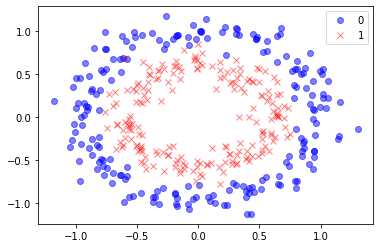

In [13]:
X, y = make_circles(
    n_samples = 400, 
    factor = 0.6,
    noise = 0.1,
    random_state = 42
)

pl = plot_data(plt, X, y)
pl.show()

In [14]:
seed = 1

print("X size =", X.shape)
print("y size =", y.shape)
print("Num of Samples =", X.shape[0])

X size = (400, 2)
y size = (400,)
Num of Samples = 400


In [15]:
print(X)

[[ 5.22047667e-01  2.45076964e-01]
 [-4.90174568e-01  4.04540597e-01]
 [ 4.69901235e-01  9.04544287e-01]
 [ 7.37010889e-01  1.11486553e-01]
 [-9.86636209e-01  1.69521513e-01]
 [-7.17008501e-01  4.38359514e-01]
 [-4.41013452e-01 -5.31920699e-01]
 [-9.95858989e-01  1.08030813e-01]
 [-3.25897203e-01  5.41504194e-01]
 [-6.96094447e-01 -6.45797770e-01]
 [ 9.28358178e-01  2.58529455e-01]
 [ 2.30348927e-01 -3.40047801e-01]
 [-2.66141506e-01  1.17464969e+00]
 [-7.55781307e-01  7.93410286e-01]
 [-5.69765424e-01 -9.25855019e-01]
 [ 3.18599125e-01  1.02857282e+00]
 [-5.10432759e-01  1.73074993e-01]
 [ 3.95376430e-01 -3.96807852e-01]
 [ 3.37431388e-01  5.71841873e-01]
 [ 7.27958177e-01 -2.31006816e-01]
 [-6.93334233e-01  6.76130038e-01]
 [ 1.00825010e+00  5.07130501e-01]
 [ 6.51086779e-01  1.35010193e-02]
 [-3.45045802e-01  4.46996781e-01]
 [ 1.04462893e+00  1.13624232e-01]
 [ 6.45411496e-01  3.08639177e-02]
 [-9.71724535e-01 -5.12587714e-01]
 [ 3.69760307e-01  2.97525839e-01]
 [-2.09844774e-01  5

In [16]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

In [17]:
model.add(Dense(1, activation = 'sigmoid', input_dim = 2))
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy')

In [18]:
model.fit(X, y, batch_size = 5, epochs=  100, verbose = 1)

Epoch 1/100
80/80 [==============================] - 0s 564us/step - loss: 0.7649
Epoch 2/100
80/80 [==============================] - 0s 512us/step - loss: 0.7566
Epoch 3/100
80/80 [==============================] - 0s 600us/step - loss: 0.7493
Epoch 4/100
80/80 [==============================] - 0s 674us/step - loss: 0.7426
Epoch 5/100
80/80 [==============================] - 0s 877us/step - loss: 0.7368
Epoch 6/100
80/80 [==============================] - 0s 952us/step - loss: 0.7315
Epoch 7/100
80/80 [==============================] - 0s 988us/step - loss: 0.7269
Epoch 8/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7227
Epoch 9/100
80/80 [==============================] - 0s 1ms/step - loss: 0.7191
Epoch 10/100
80/80 [==============================] - 0s 2ms/step - loss: 0.7159
Epoch 11/100
80/80 [==============================] - 0s 2ms/step - loss: 0.7131
Epoch 12/100
80/80 [==============================] - 0s 2ms/step - loss: 0.7106
Epoch 13/100
80/80 [===

80/80 [==============================] - 0s 1ms/step - loss: 0.6935


In [19]:
matplotlib.rcParams['figure.figsize'] = (8.0, 6.0)

In [20]:
def plot_decision_bound(model, X, y):
    # X shape -> (400, 2)
    # a = x, b = y
    amin, bmin = X.min(axis = 0) - 0.45
    amax, bmax = X.max(axis = 0) + 0.45
    #print("amin =", amin)
    #print("bmin =", bmin)
    #print("amax =", amax)
    #print("bmax =", bmax)
    
    # np.linspace()는 
    # 첫번째 인자 - 두번째 인자 사이의 값을
    # 세번째 인자의 개수만큼 균일하게 쪼갠다.

    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    # meshgrid()는 x축 정보(벡터),  y축 정보(벡터)를 입력 받아
    # 사각형 영역에 대한 정보를 반환한다.
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # model.predict(ab)를 사용하여 아래쪽에서 contourt를 사용할 준비를 한다.
    c = model.predict(ab)
    Z = c.reshape(aa.shape)
    
    #  alpha값은 투명도 낮을수록 높
    plt.contourf(aa, bb, Z, cmap = 'bwr', alpha = 0.2)
    plot_data(plt, X, y)
    return plt

Text(0.5, 1.0, 'Logistic Regression')

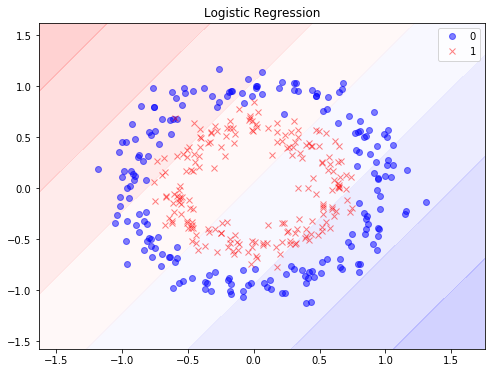

In [21]:
plot_decision_bound(model, X, y)
plt.title("Logistic Regression")

In [22]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(3, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  200, verbose = 1)


Epoch 1/200
80/80 [==============================] - 0s 523us/step - loss: 0.7749
Epoch 2/200
80/80 [==============================] - 0s 771us/step - loss: 0.7541
Epoch 3/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7414
Epoch 4/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7345
Epoch 5/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7297
Epoch 6/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7262
Epoch 7/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7231
Epoch 8/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7204
Epoch 9/200
80/80 [==============================] - 0s 1ms/step - loss: 0.7180
Epoch 10/200
80/80 [==============================] - 0s 866us/step - loss: 0.7160
Epoch 11/200
80/80 [==============================] - 0s 911us/step - loss: 0.7141
Epoch 12/200
80/80 [==============================] - 0s 876us/step - loss: 0.7124
Epoch 13/200
80/80 [=======

80/80 [==============================] - 0s 906us/step - loss: 0.6652
Epoch 102/200
80/80 [==============================] - 0s 1ms/step - loss: 0.6651
Epoch 103/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6647
Epoch 104/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6644
Epoch 105/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6640
Epoch 106/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6637
Epoch 107/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6634
Epoch 108/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6631
Epoch 109/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6628
Epoch 110/200
80/80 [==============================] - 0s 2ms/step - loss: 0.6624
Epoch 111/200
 1/80 [..............................] - ETA: 0s - loss: 0.6546

KeyboardInterrupt: 

Text(0.5, 1.0, 'hidden Layer 3(tanh)')

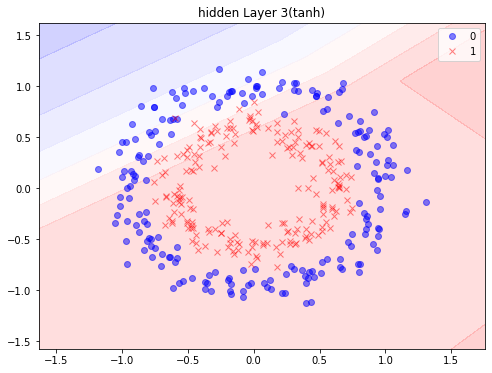

In [23]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 3(tanh)")

In [26]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  2, verbose = 1)


Epoch 1/2
80/80 [==============================] - 0s 494us/step - loss: 0.7121
Epoch 2/2
80/80 [==============================] - 0s 493us/step - loss: 0.7056


Text(0.5, 1.0, 'hidden Layer 3(tanh)')

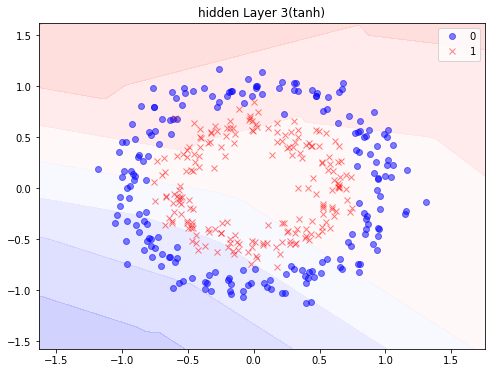

In [27]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 3(tanh)")

In [28]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  2, verbose = 1)


Epoch 1/2
80/80 [==============================] - 0s 552us/step - loss: 0.6946
Epoch 2/2
80/80 [==============================] - 0s 515us/step - loss: 0.6922


Text(0.5, 1.0, 'hidden Layer 6(tanh)')

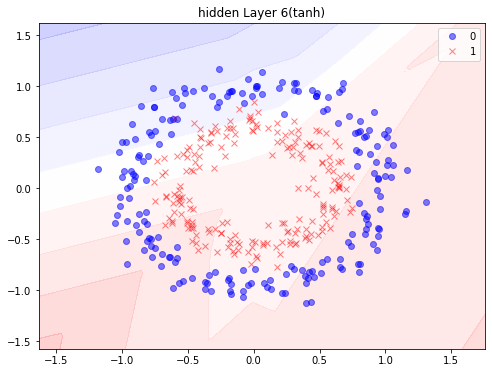

In [29]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 6(tanh)")

In [30]:
X, y = make_circles(
    # 샘플 개수가 적더라도 정확한 데이터를 수집하는게 중요하다.
    # 잘못된 정보를 수집하면 제대로된 a.i가 될 수 없다.
    n_samples = 500, 
    factor = 0.6,
    noise = 0.1,
    random_state = 42
)
# 샘플의 개수가 적으니 인공 신경망 특성상
# 성능의 저하가 발생하는것을 발견 할수 있었다.

In [31]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(6, activation = 'relu', input_dim = 2))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  5, verbose = 1)


Epoch 1/5
100/100 [==============================] - 0s 460us/step - loss: 0.7153
Epoch 2/5
100/100 [==============================] - 0s 472us/step - loss: 0.7082
Epoch 3/5
100/100 [==============================] - 0s 480us/step - loss: 0.7024
Epoch 4/5
100/100 [==============================] - 0s 560us/step - loss: 0.6987
Epoch 5/5
100/100 [==============================] - 0s 490us/step - loss: 0.6957


Text(0.5, 1.0, 'hidden Layer 6(tanh)')

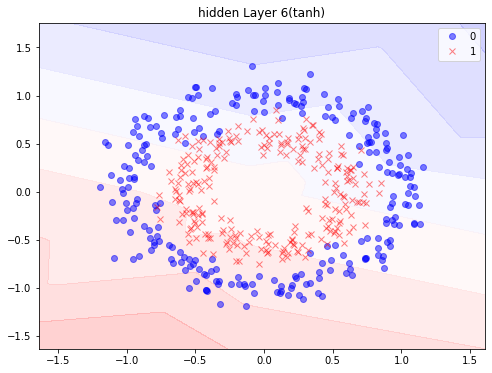

In [32]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 6(tanh)")

In [33]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(12, activation = 'relu', input_dim = 2))
model.add(Dense(6, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  5, verbose = 1)

Epoch 1/5
100/100 [==============================] - 0s 819us/step - loss: 0.6956
Epoch 2/5
100/100 [==============================] - 0s 530us/step - loss: 0.6841
Epoch 3/5
100/100 [==============================] - 0s 1ms/step - loss: 0.6743
Epoch 4/5
100/100 [==============================] - 0s 2ms/step - loss: 0.6655
Epoch 5/5
100/100 [==============================] - 0s 2ms/step - loss: 0.6563


Text(0.5, 1.0, 'hidden Layer 12(tanh)')

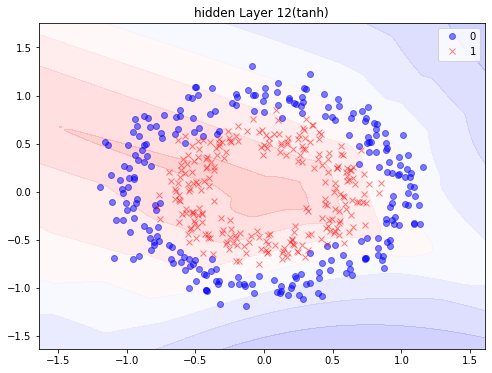

In [34]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 12(tanh)")

In [36]:
from keras.layers import Dense, Activation
from keras.models import Sequential

np.random.seed(seed)

model = Sequential()

model.add(Dense(256, activation = 'relu', input_dim = 2))
model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='sgd', loss = 'binary_crossentropy')

model.fit(X, y, batch_size = 5, epochs=  5, verbose = 1)

Epoch 1/5
100/100 [==============================] - 0s 725us/step - loss: 0.6838
Epoch 2/5
100/100 [==============================] - 0s 670us/step - loss: 0.6287
Epoch 3/5
100/100 [==============================] - 0s 794us/step - loss: 0.5198
Epoch 4/5
100/100 [==============================] - 0s 905us/step - loss: 0.3421
Epoch 5/5
100/100 [==============================] - 0s 1ms/step - loss: 0.2350


Text(0.5, 1.0, 'hidden Layer 12(tanh)')

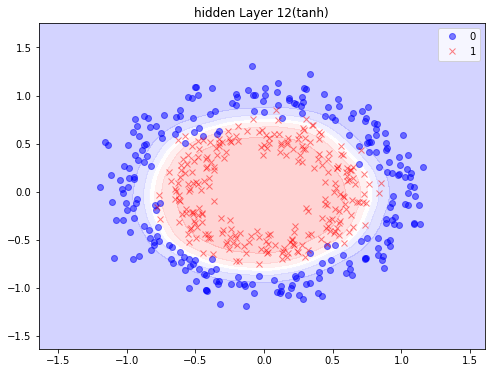

In [37]:
plot_decision_bound(model, X, y)
plt.title("hidden Layer 12(tanh)")

In [38]:
!ls

Applied-Deep-Learning-with-Keras  eleventh.ipynb  README.md
data				  LICENSE	  seventh.ipynb
eighth.ipynb			  nineth.ipynb	  tenth.ipynb


In [39]:
!ls Applied-Deep-Learning-with-Keras/Lesson02

Activity02.ipynb     bank_data_target.csv  Exercise07.ipynb  Exercise09.ipynb
bank_data_feats.csv  Exercise06.ipynb	   Exercise08.ipynb


In [40]:
import pandas as pd

data = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_feats.csv",
    index_col = 0
)
y = pd.read_csv(
    "Applied-Deep-Learning-with-Keras/Lesson02/bank_data_target.csv",
    index_col = 0
)

X = data

In [41]:
print("Num of Dataset = ", data.shape[0])
print("Num of Features = ", data.shape[1])

print(y.shape)

Num of Dataset =  4521
Num of Features =  32
(4521, 1)


In [42]:
from keras.models import Sequential
from keras.layers import Dense

def build_model():
    model = Sequential()
    
    model.add(Dense(16, input_dim = X.shape[1], activation = 'relu'))
    model.add(Dense(8, activation = 'relu'))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    
    return model

In [43]:
import numpy as np

from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [44]:
seed = 1

np.random.seed(seed)

In [45]:
n_folds = 5
epochs = 5
batch_size = 10

# 분류 작업을 할 때 사용하는 분류기 생성자
classifier = KerasClassifier(
    # 실질적으로 분류를 수행하는데 사용할 모델을 만드는 함수
    build_fn = build_model,
    # 몇 회 반복을 할 것인가
    epochs = epochs,
    batch_size = batch_size,
    verbose = 1
)

In [46]:
# 우리가 가지고 있는 Train, Test 데이터에 대한 검증 생성자
# Train, Test 총합 1000개 있다고 가정
# 1. Train 0 ~ 799, Test 800 ~ 999
# 2. Train 200 ~ 999, Test 0 ~ 199
# 3. Train 0 ~199, 400 ~ 999, Test 200 ~ 399
# .........
kfold = StratifiedKFold(
    # 전체 구간을 5 번으로 분할해서 검증하도록 만든다.
    n_splits = n_folds,
    shuffle = True,
    random_state = seed
)

In [47]:
# 위에서 만든 분류기와 검증기를 전달해서 X, y값에 대한 교차 검증을 수행한다.
results = cross_val_score(classifier, X, y, cv = kfold)

Epoch 1/5
362/362 [==============================] - 0s 708us/step - loss: 4.4171 - accuracy: 0.8283
Epoch 2/5
362/362 [==============================] - 0s 960us/step - loss: 1.6994 - accuracy: 0.8429
Epoch 3/5
362/362 [==============================] - 0s 1ms/step - loss: 1.3446 - accuracy: 0.8426
Epoch 4/5
362/362 [==============================] - 0s 1ms/step - loss: 1.1430 - accuracy: 0.8496
Epoch 5/5
91/91 [==============================] - 0s 528us/step - loss: 0.9073 - accuracy: 0.8818
Epoch 1/5
362/362 [==============================] - 0s 641us/step - loss: 4.7313 - accuracy: 0.8034
Epoch 2/5
362/362 [==============================] - 0s 1ms/step - loss: 0.8243 - accuracy: 0.8485
Epoch 3/5
362/362 [==============================] - 1s 1ms/step - loss: 1.1901 - accuracy: 0.8507
Epoch 4/5
362/362 [==============================] - 1s 2ms/step - loss: 1.0226 - accuracy: 0.8565
Epoch 5/5
91/91 [==============================] - 0s 511us/step - loss: 1.7429 - accuracy: 0.8628
Epoc

In [48]:
for f in range(n_folds):
    print("Accuracy at fold", f + 1, "=", results[f])

print("")
print("Final Cross Valid Test Accuracy:", results.mean())
print("Standard Deviation of Final Test Accuracy:", results.std())

Accuracy at fold 1 = 0.8817679286003113
Accuracy at fold 2 = 0.8628318309783936
Accuracy at fold 3 = 0.8827433586120605
Accuracy at fold 4 = 0.88606196641922
Accuracy at fold 5 = 0.8871681690216064

Final Cross Valid Test Accuracy: 0.8801146507263183
Standard Deviation of Final Test Accuracy: 0.008870873413700084


In [49]:
# default parameter는 만약 인자가 없으면
# 자동으로 해당 인자(parameter)를
def model_build1(activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    
    model.add(Dense(16, input_dim = X.shape[1], activation = activation ))
    model.add(Dense(8, activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    
    return model
    
def model_build2(activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    
    model.add(Dense(16, input_dim = X.shape[1], activation = activation ))
    model.add(Dense(8, activation = activation))
    model.add(Dense(4, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    
    return model

def model_build3(activation = 'relu', optimizer = 'adam'):
    model = Sequential()
    
    model.add(Dense(8, input_dim = X.shape[1], activation = activation ))
    model.add(Dense(4, activation = activation))
    model.add(Dense(1, activation = 'sigmoid'))
    
    model.compile(
        loss = 'binary_crossentropy',
        optimizer = 'adam',
        metrics = ['accuracy']
    )
    
    return model
    

In [51]:
n_folds = 5
batch_size = 5
epochs = 5

results  = []

models = [model_build1, model_build2, model_build3]


In [52]:
for idx in range(len(models)):
    classifier = KerasClassifier(
        build_fn = models[idx],
        epochs = epochs,
        batch_size = batch_size,
        verbose = 1
    )
    
    kfold = StratifiedKFold(
        n_splits = n_folds,
        shuffle = True,
        random_state = seed
    )
    
    result = cross_val_score(classifier, X, y, cv = kfold)
    
    results.append(result)

Epoch 1/5
724/724 [==============================] - 0s 639us/step - loss: 3.7557 - accuracy: 0.8554
Epoch 2/5
724/724 [==============================] - 1s 1ms/step - loss: 0.4520 - accuracy: 0.8850
Epoch 3/5
724/724 [==============================] - 1s 1ms/step - loss: 0.3882 - accuracy: 0.8850
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 0.3619 - accuracy: 0.8850
Epoch 5/5
181/181 [==============================] - 0s 513us/step - loss: 0.3616 - accuracy: 0.8840
Epoch 1/5
724/724 [==============================] - 1s 2ms/step - loss: 1.5642 - accuracy: 0.8435
Epoch 2/5
724/724 [==============================] - 1s 2ms/step - loss: 1.1124 - accuracy: 0.8551
Epoch 3/5
724/724 [==============================] - 1s 2ms/step - loss: 0.9161 - accuracy: 0.8485
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 0.9823 - accuracy: 0.8582
Epoch 5/5
181/181 [==============================] - 0s 634us/step - loss: 0.4726 - accuracy: 0.8285
Epoc

181/181 [==============================] - 0s 531us/step - loss: 0.3329 - accuracy: 0.8949
Epoch 1/5
724/724 [==============================] - 1s 2ms/step - loss: 23.4271 - accuracy: 0.6898
Epoch 2/5
724/724 [==============================] - 1s 1ms/step - loss: 1.5490 - accuracy: 0.8380
Epoch 3/5
724/724 [==============================] - 1s 1ms/step - loss: 0.9410 - accuracy: 0.8532
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 0.8702 - accuracy: 0.8504
Epoch 5/5
181/181 [==============================] - 0s 512us/step - loss: 1.0639 - accuracy: 0.8529


In [53]:
for idx in range(len(models)):
    print("Model", idx + 1, "Test Accuracy =", results[idx].mean())

Model 1 Test Accuracy = 0.8571053266525268
Model 2 Test Accuracy = 0.8821053147315979
Model 3 Test Accuracy = 0.8712648630142212


In [54]:

# Hyper Paramater (초 매개변수)
# 교차 검증을 통ㅎ서 어떤 녀석을 활요하는 것이 가장 좋은지 판정할 수 있다. > 물론 난 컴퓨터를 사용할 수 없게 된다.
optimizers = ['rmsprop', 'adam', 'sgd']
activations = ['relu', 'tanh']

for opt in range(len(optimizers)):
    for active in range(len(activations)):
        optimizer = optimizers[opt]
        activation = activations[active]
        
        classifier = KerasClassifier(
            build_fn = model_build1,
            epochs = 5,
            batch_size = 5,
            verbose = 1
        )
        
        kfold = StratifiedKFold(
            n_splits = n_folds,
            shuffle = True,
            random_state = seed
        )
        
        result = cross_val_score(classifier, X, y, cv = kfold)
        
        results.append(result)

Epoch 1/5
724/724 [==============================] - 1s 1ms/step - loss: 15.2820 - accuracy: 0.7804
Epoch 2/5
724/724 [==============================] - 1s 1ms/step - loss: 0.4999 - accuracy: 0.8653
Epoch 3/5
724/724 [==============================] - 1s 719us/step - loss: 0.3785 - accuracy: 0.8717
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 0.3524 - accuracy: 0.8764
Epoch 5/5
181/181 [==============================] - 0s 543us/step - loss: 0.3877 - accuracy: 0.8851
Epoch 1/5
724/724 [==============================] - 1s 2ms/step - loss: 1.0616 - accuracy: 0.8142
Epoch 2/5
724/724 [==============================] - 2s 3ms/step - loss: 0.5189 - accuracy: 0.8714
Epoch 3/5
724/724 [==============================] - 1s 1ms/step - loss: 0.3740 - accuracy: 0.8839
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 0.3734 - accuracy: 0.8833
Epoch 5/5
181/181 [==============================] - 0s 540us/step - loss: 0.3132 - accuracy: 0.8872
Epo

181/181 [==============================] - 0s 640us/step - loss: 0.6753 - accuracy: 0.8595
Epoch 1/5
724/724 [==============================] - 1s 960us/step - loss: 2.5075 - accuracy: 0.8018
Epoch 2/5
724/724 [==============================] - 1s 1ms/step - loss: 1.6112 - accuracy: 0.8377
Epoch 3/5
724/724 [==============================] - 1s 1ms/step - loss: 1.1172 - accuracy: 0.8441
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 1.0246 - accuracy: 0.8507
Epoch 5/5
181/181 [==============================] - 0s 666us/step - loss: 0.3797 - accuracy: 0.8706
Epoch 1/5
724/724 [==============================] - 1s 1ms/step - loss: 5.5947 - accuracy: 0.7630
Epoch 2/5
724/724 [==============================] - 1s 1ms/step - loss: 0.4379 - accuracy: 0.8695
Epoch 3/5
724/724 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8733
Epoch 4/5
724/724 [==============================] - 1s 1ms/step - loss: 0.3792 - accuracy: 0.8736
Epoch 5/5
181/

181/181 [==============================] - 0s 649us/step - loss: 0.9402 - accuracy: 0.8872
Epoch 1/5
724/724 [==============================] - 1s 2ms/step - loss: 1.2648 - accuracy: 0.8347
Epoch 2/5
724/724 [==============================] - 1s 2ms/step - loss: 0.8994 - accuracy: 0.8474
Epoch 3/5
724/724 [==============================] - 1s 2ms/step - loss: 0.6632 - accuracy: 0.8584
Epoch 4/5
724/724 [==============================] - 1s 2ms/step - loss: 0.6822 - accuracy: 0.8634
Epoch 5/5
181/181 [==============================] - 0s 804us/step - loss: 0.3800 - accuracy: 0.8761
Epoch 1/5
724/724 [==============================] - 1s 2ms/step - loss: 1.1861 - accuracy: 0.8474
Epoch 2/5
724/724 [==============================] - 1s 2ms/step - loss: 0.3773 - accuracy: 0.8817
Epoch 3/5
724/724 [==============================] - 1s 2ms/step - loss: 0.3450 - accuracy: 0.8861
Epoch 4/5
724/724 [==============================] - 2s 2ms/step - loss: 0.3309 - accuracy: 0.8872
Epoch 5/5
181/18

In [55]:
c = 0
for opt in range(len(optimizers)):
    for active in range(len(activations)):
        print("activation =", activations[active])
        print("optimizer =", optimizers[opt])
        print("Test Accuracy =", results[c].mean())
        c += 1

activation = relu
optimizer = rmsprop
Test Accuracy = 0.8571053266525268
activation = tanh
optimizer = rmsprop
Test Accuracy = 0.8821053147315979
activation = relu
optimizer = adam
Test Accuracy = 0.8712648630142212
activation = tanh
optimizer = adam
Test Accuracy = 0.8874148011207581
activation = relu
optimizer = sgd
Test Accuracy = 0.8635222315788269
activation = tanh
optimizer = sgd
Test Accuracy = 0.8756906151771545
